# Plant Disease Prediction

## Importing libraries

In [401]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [403]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 308 files belonging to 51 classes.


### Validation Image Preprocessing

In [405]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 97 files belonging to 51 classes.


## Building Model

In [407]:
cnn = tf.keras.models.Sequential()

# Input Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# Adjust the pooling layer here
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Remove or modify the final pooling layers to avoid excessive downsampling
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# No pooling here to maintain dimensions

# Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten Layer
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layers
cnn.add(tf.keras.layers.Dense(units=2500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(tf.keras.layers.Dense(units=51, activation='softmax'))

# Print Model Summary
cnn.summary()


C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_133 (Conv2D)             │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_134 (Conv2D)             │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_138 (Conv2D)             │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_139 (Conv2D)             │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_140 (Conv2D)             │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2500)           │    81,922,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 51)             │       127,551 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,762,275 (330.97 MB)

 Trainable params: 86,762,275 (330.97 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [419]:
import tensorflow as tf

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [421]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.1371 - loss: 3.4827 - val_accuracy: 0.0206 - val_loss: 3.8826
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.1652 - loss: 3.3970 - val_accuracy: 0.0825 - val_loss: 3.7648
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.2911 - loss: 2.9543 - val_accuracy: 0.0825 - val_loss: 3.7430
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.3337 - loss: 2.5927 - val_accuracy: 0.0412 - val_loss: 3.7971
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.3676 - loss: 2.4409 - val_accuracy: 0.1546 - val_loss: 3.6364
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.5803 - loss: 1.9362 - val_accuracy: 0.1340 - val_loss: 3.5058
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5939 - loss: 1.6772 - val_accuracy: 0.1753 - val_loss: 3.4433
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.7573 - loss: 1.2155 - val_accuracy: 0.1959 - val_loss:

## Evaluating Model

In [423]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9911 - loss: 0.2972
Training accuracy: 0.9870129823684692


In [425]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3111 - loss: 2.8189
Validation accuracy: 0.3298968970775604


### Saving Model

In [480]:
cnn.save('trained_plant_Identification_model.keras')

In [431]:
training_history.history #Return Dictionary of history

{'accuracy': [0.08441558480262756,
  0.17207792401313782,
  0.26623377203941345,
  0.33766233921051025,
  0.37662336230278015,
  0.5714285969734192,
  0.5876623392105103,
  0.7240259647369385,
  0.7727272510528564,
  0.8279221057891846],
 'loss': [3.5797717571258545,
  3.3585498332977295,
  2.967876434326172,
  2.5684797763824463,
  2.4353342056274414,
  1.9647725820541382,
  1.6629695892333984,
  1.2643957138061523,
  0.976048469543457,
  0.7410995364189148],
 'val_accuracy': [0.020618556067347527,
  0.0824742242693901,
  0.0824742242693901,
  0.04123711213469505,
  0.15463916957378387,
  0.1340206116437912,
  0.17525772750377655,
  0.19587628543376923,
  0.20618556439876556,
  0.3298968970775604],
 'val_loss': [3.8826258182525635,
  3.7647974491119385,
  3.7430052757263184,
  3.7970938682556152,
  3.636439800262451,
  3.505828857421875,
  3.443277597427368,
  3.2642526626586914,
  3.2511603832244873,
  2.757998466491699]}

In [434]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [436]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

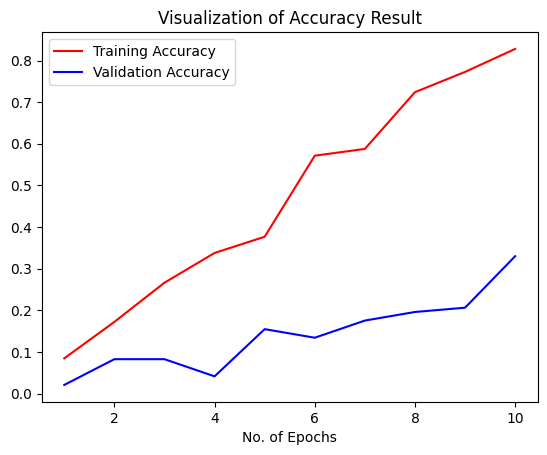

In [440]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

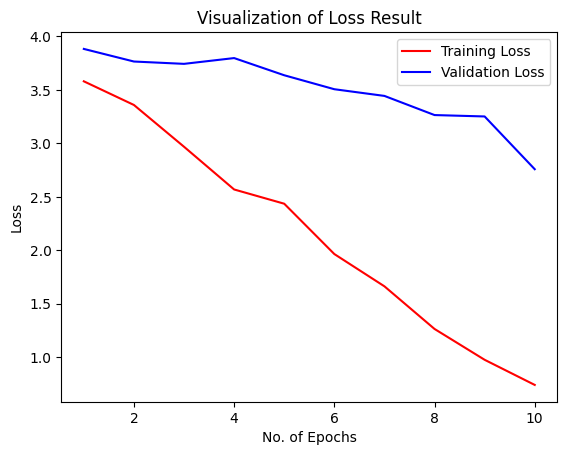

In [442]:
epochs = [i for i in range(1, 11)]  # Adjust range to match the number of epochs

# Plot Training and Validation Loss
plt.plot(epochs,training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()


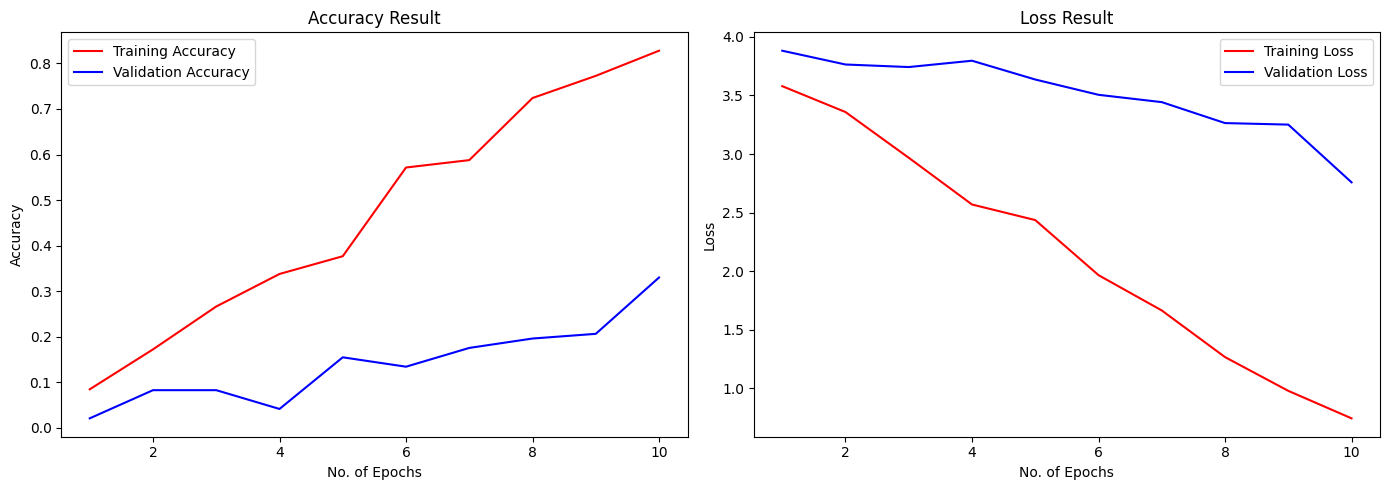

In [444]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
ax[0].plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
ax[0].set_title('Accuracy Result')
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Loss Plot
ax[1].plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
ax[1].plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
ax[1].set_title('Loss Result')
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

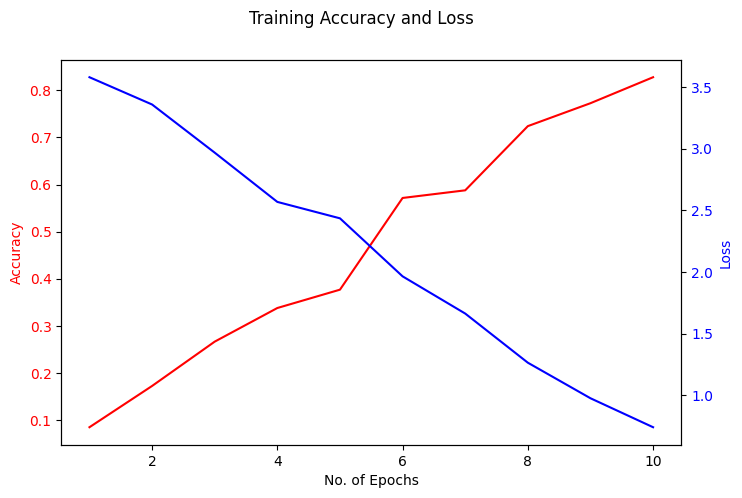

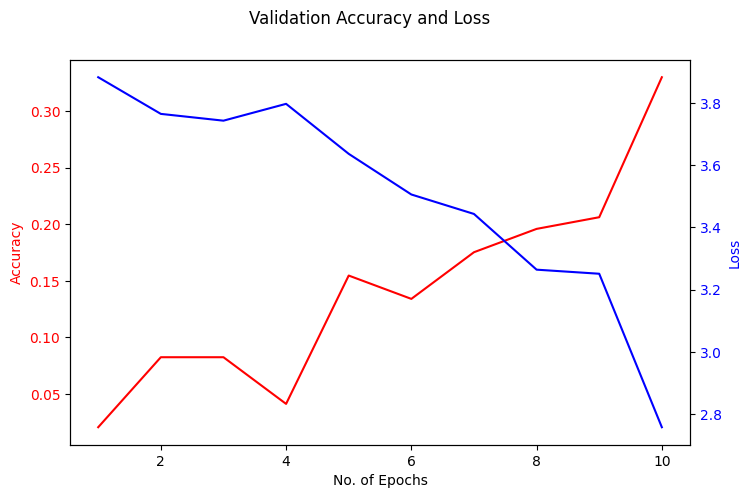

In [446]:
# Plot for Training Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Training Accuracy
ax1.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin y-axis for Training Loss
ax2 = ax1.twinx()
ax2.plot(epochs, training_history.history['loss'], color='blue', label='Training Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Training Accuracy and Loss')
plt.show()

# Plot for Validation Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Validation Accuracy
ax1.plot(epochs, training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin y-axis for Validation Loss
ax2 = ax1.twinx()
ax2.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Validation Accuracy and Loss')
plt.show()

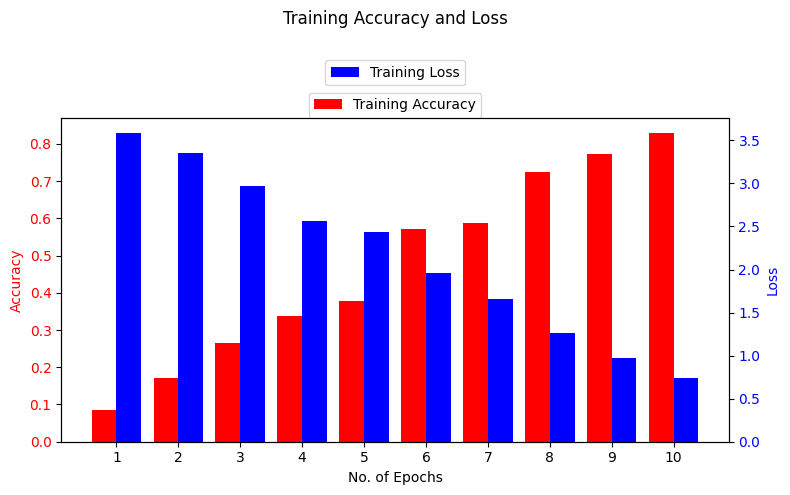

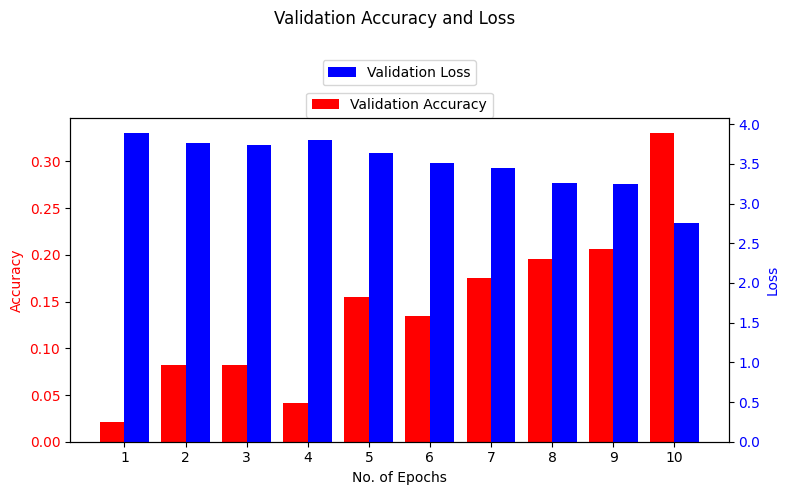

In [448]:
import numpy as np

# Set width for the bars
bar_width = 0.4  # Width of each bar
epochs = np.arange(1, 11)  # Epochs from 1 to 10

# Training Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bars for Training Accuracy
ax1.bar(epochs - bar_width / 2, training_history.history['accuracy'], bar_width, color='red', label='Training Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Bars for Training Loss (on second y-axis)
ax2 = ax1.twinx()
ax2.bar(epochs + bar_width / 2, training_history.history['loss'], bar_width, color='blue', label='Training Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set x-axis ticks
ax1.set_xticks(epochs)  # Ensure all epochs from 1 to 10 are shown

# Add Title and Legends
fig.suptitle('Training Accuracy and Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.tight_layout()
plt.show()

# Validation Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bars for Validation Accuracy
ax1.bar(epochs - bar_width / 2, training_history.history['val_accuracy'], bar_width, color='red', label='Validation Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Bars for Validation Loss (on second y-axis)
ax2 = ax1.twinx()
ax2.bar(epochs + bar_width / 2, training_history.history['val_loss'], bar_width, color='blue', label='Validation Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set x-axis ticks
ax1.set_xticks(epochs)  # Ensure all epochs from 1 to 10 are shown

# Add Title and Legends
fig.suptitle('Validation Accuracy and Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.tight_layout()
plt.show()

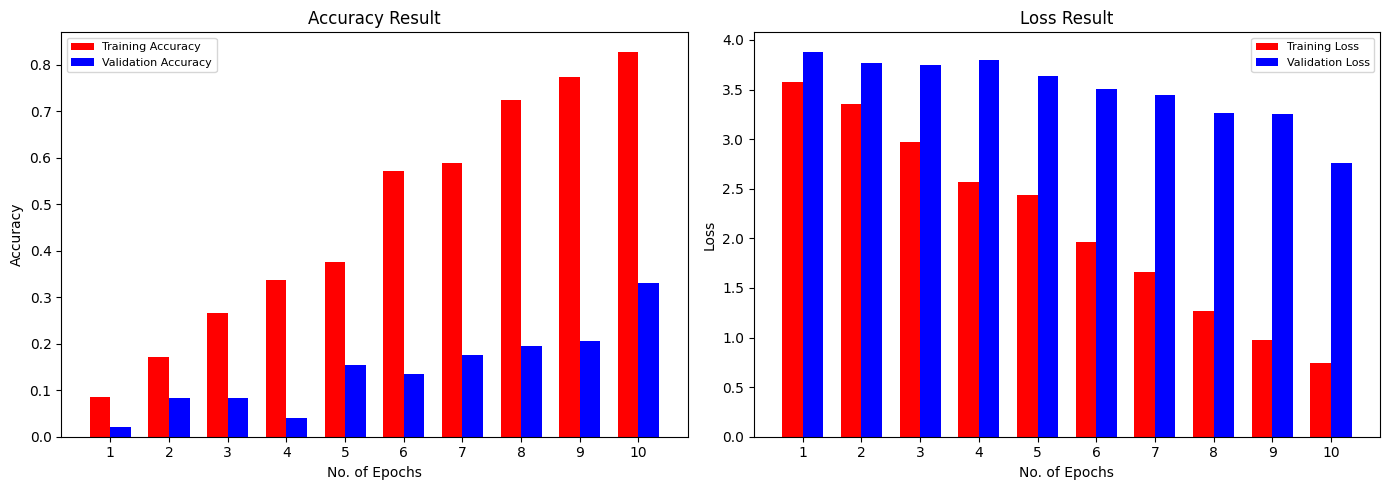

In [450]:
import numpy as np

# Define the width of the bars
bar_width = 0.35  # Width of the bars
epochs = np.arange(1, len(training_history.history['accuracy']) + 1)  # Epoch numbers

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot (Bar Chart)
ax[0].bar(epochs - bar_width / 2, training_history.history['accuracy'], bar_width, color='red', label='Training Accuracy')
ax[0].bar(epochs + bar_width / 2, training_history.history['val_accuracy'], bar_width, color='blue', label='Validation Accuracy')
ax[0].set_title('Accuracy Result')
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(epochs)  # Ensure all epochs are labeled
ax[0].legend(fontsize=8)  # Set smaller font size for legend

# Loss Plot (Bar Chart)
ax[1].bar(epochs - bar_width / 2, training_history.history['loss'], bar_width, color='red', label='Training Loss')
ax[1].bar(epochs + bar_width / 2, training_history.history['val_loss'], bar_width, color='blue', label='Validation Loss')
ax[1].set_title('Loss Result')
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_xticks(epochs)  # Ensure all epochs are labeled
ax[1].legend(fontsize=8)  # Set smaller font size for legend

plt.tight_layout()
plt.show()


## Some other metrics for model evaluation

In [120]:
class_name = validation_set.class_names

In [452]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 97 files belonging to 51 classes.


In [454]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step


In [456]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [462]:
Y_true

<tf.Tensor: shape=(97,), dtype=int64, numpy=
array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 21, 23, 23, 24, 24, 25, 25, 26, 26, 27,
       27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35,
       36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 42, 42, 43, 43, 44, 44,
       45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50])>

In [464]:
predicted_categories

<tf.Tensor: shape=(97,), dtype=int64, numpy=
array([24,  2,  2,  2, 18, 23, 24, 46, 24,  4, 13,  5, 19,  6, 11, 30, 46,
       39, 49, 31, 10, 10, 11, 11, 12, 12, 18, 13, 50, 14, 11, 15, 36,  2,
       17, 50, 11, 18, 19, 19, 20, 24, 37, 31, 11,  2, 49,  1, 26,  2, 27,
       15, 47, 28, 46, 29, 29, 30, 24, 31, 29, 11, 33, 33, 28, 46,  3, 11,
       19, 31, 48, 31, 37, 46, 31, 47, 40, 40, 49, 19, 19, 11, 46,  0, 34,
       45, 45, 11, 31, 11, 47, 11, 48, 24, 46, 11, 50])>

In [466]:
print(len(class_name))  # This should be 50
print(class_name)       # Check the content


50
['Black grass49', 'Black grass50', 'Black grass51', 'Black grass52', 'Charlock33', 'Charlock34', 'Charlock35', 'Charlock36', 'Cleavers25', 'Cleavers26', 'Cleavers27', 'Cleavers28', 'Cranes_bill41', 'Cranes_bill42', 'Cranes_bill43', 'Cranes_bill44', 'Fat Hen37', 'Fat Hen38', 'Fat Hen39', 'Fat Hen40', 'Fersken pileurt_dead_29', 'Field Pansy 45', 'Field Pansy 47', 'Loose Silky_bent53', 'Loose Silky_bent54', 'Loose Silky_bent55', 'Loose Silky_bent56', 'Majs1', 'Majs2', 'Majs3', 'Majs4', 'Sugar beet10', 'Sugar beet11', 'Sugar beet12', 'Sugar beet9', 'Wheat5', 'Wheat6', 'Wheat7', 'Wheat8', 'chickweed17', 'chickweed18', 'chickweed19', 'chickweed20', 'scentless mayweed13', 'scentless mayweed14', 'scentless mayweed15', 'scentless mayweed16', "shepherd's_purse 21", "shepherd's_purse 22", "shepherd's_purse 23"]


In [468]:
class_name = class_name[:50]  # Keep only the first 50 names


In [470]:
print(len(set(Y_true.numpy())))  # Should be 50
print(len(set(predicted_categories.numpy())))  # Should also be 50


50
37


In [472]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                         precision    recall  f1-score   support

          Black grass49       0.00      0.00      0.00         2
          Black grass50       0.00      0.00      0.00         2
          Black grass51       0.00      0.00      0.00         2
          Black grass52       0.00      0.00      0.00         2
             Charlock33       1.00      0.50      0.67         2
             Charlock34       1.00      0.50      0.67         2
             Charlock35       1.00      0.50      0.67         2
             Charlock36       0.00      0.00      0.00         2
             Cleavers25       0.00      0.00      0.00         2
             Cleavers26       0.00      0.00      0.00         2
             Cleavers27       1.00      1.00      1.00         2
             Cleavers28       0.15      1.00      0.27         2
          Cranes_bill41       1.00      1.00      1.00         2
          Cranes_bill42       0.50      0.50      0.50         2
          Cranes_bill43 

C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

In [476]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(Y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the dictionary into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
report_df.to_excel("classification_report.xlsx", index=True)

print("Classification report saved to 'classification_report.xlsx'")


Classification report saved to 'classification_report.xlsx'


C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

### Confusion Matrix Visualization

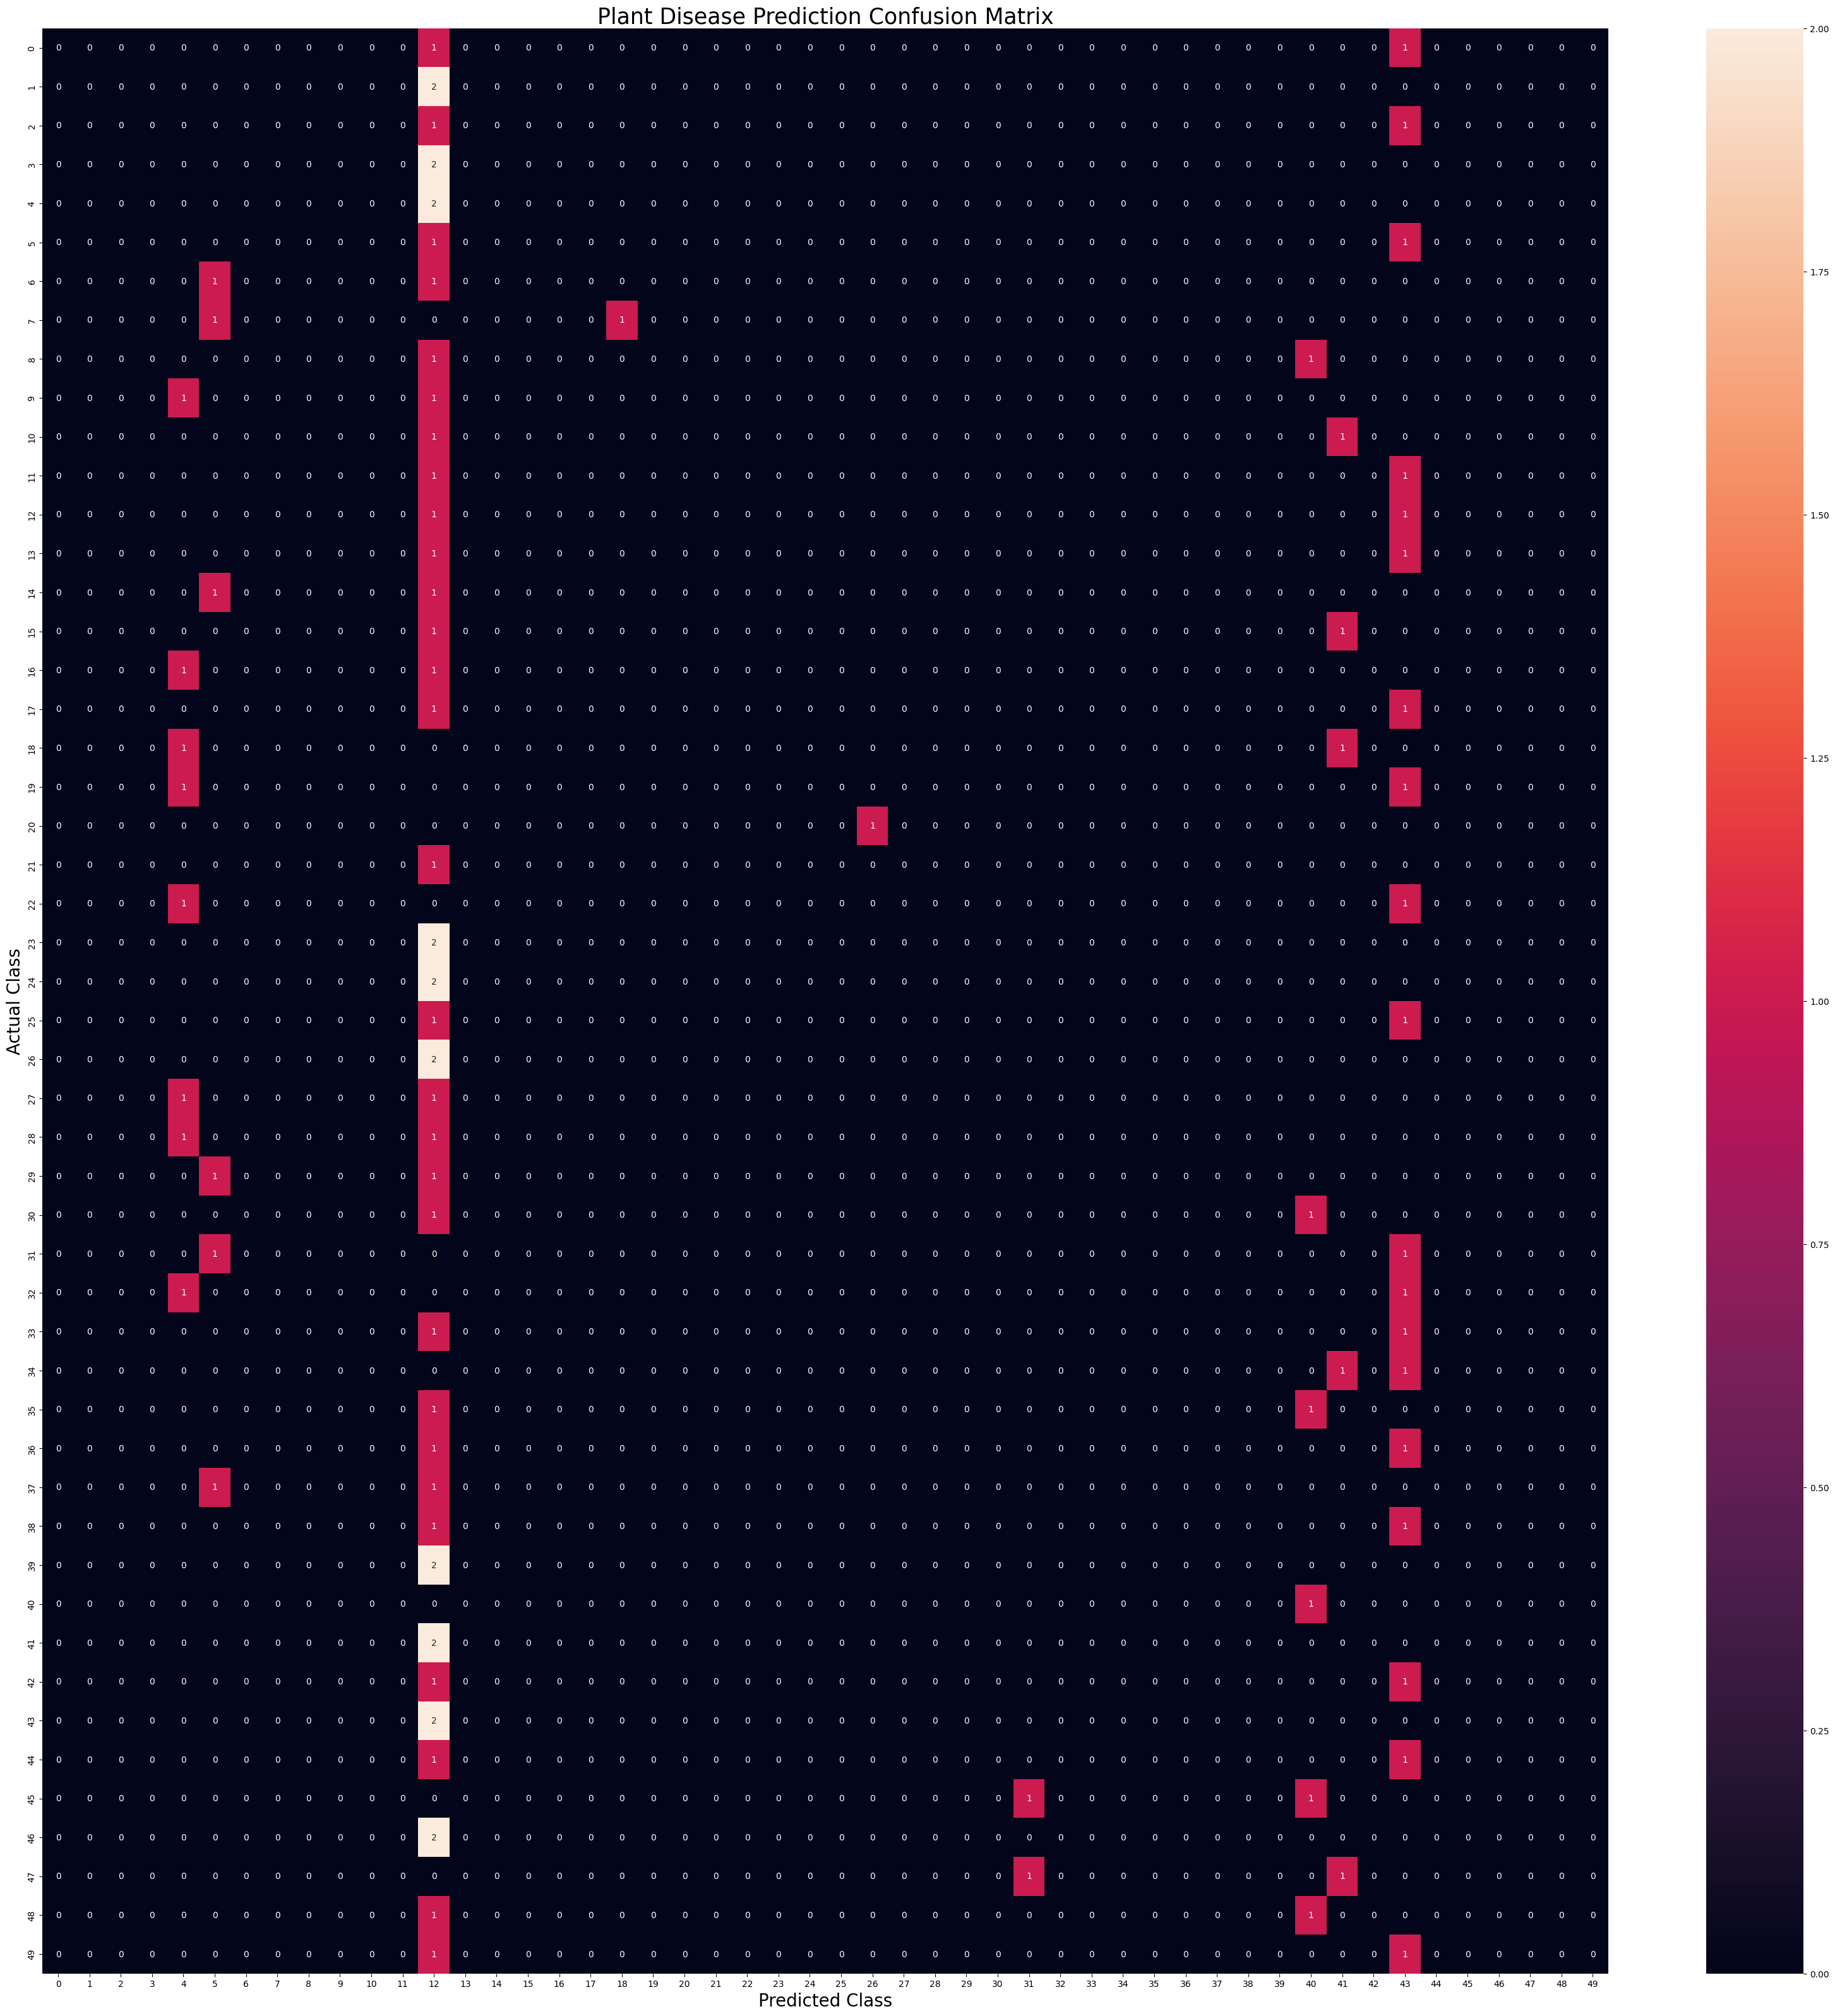

In [478]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()